# Step #1 Define the Payload

In [1]:
# the data is provided from the european centre for disease prevention and control
from datetime import date
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# define the payload that will be sent to the api endpoint, and the endpoint url
# code defines the countries for which we will retrieve data
# to retrieve data for specific countries use e.g. {'country': 'Germany'}
payload = {"code": "ALL"}  
URL = "https://api.statworx.com/covid"

# Step #2 Call the REST API Endpoint

In [2]:
# call the api
response = requests.post(url=URL, data=json.dumps(payload))
response # if the request was successful, you should see a response code 200

<Response [200]>

# Step #3 Convert the Data to a Dataframe

In [3]:
# convert the response data to a data frame
df = pd.DataFrame.from_dict(json.loads(response.text))
df

,date,day,month,year,cases,deaths,country,code,population,continent,cases_cum,deaths_cum
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,38041757.0,Asia,0,0
1,2020-01-01,01,01,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0
2,2020-01-02,02,01,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0
3,2020-01-03,03,01,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0
4,2020-01-04,04,01,2020,0,0,Afghanistan,AF,38041757.0,Asia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-12-10,10,12,2020,95,1,Zimbabwe,ZW,14645473.0,Africa,11007,304
61896,2020-12-11,11,12,2020,74,1,Zimbabwe,ZW,14645473.0,Africa,11081,305
61897,2020-12-12,12,12,2020,81,1,Zimbabwe,ZW,14645473.0,Africa,11162,306
61898,2020-12-13,13,12,2020,57,1,Zimbabwe,ZW,14645473.0,Africa,11219,307


# Step #4 Filter the Data

In [4]:
# convert date column to date format
df.loc[:, "date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# filter specific countries
list_of_countries = ["Germany", "Switzerland", "France", "Spain", "Canada"]
df_1 = df[df["country"].isin(list_of_countries)]

# filter the data to a specific timeframe
df_new = df_1[df_1["date"] > "2020-01-15"]
df_new.head()

,date,day,month,year,cases,deaths,country,code,population,continent,cases_cum,deaths_cum
10332,2020-01-16,16,01,2020,0,0,Canada,CA,37411038.0,America,0,0
10333,2020-01-17,17,01,2020,0,0,Canada,CA,37411038.0,America,0,0
10334,2020-01-18,18,01,2020,0,0,Canada,CA,37411038.0,America,0,0
10335,2020-01-19,19,01,2020,0,0,Canada,CA,37411038.0,America,0,0
10336,2020-01-20,20,01,2020,0,0,Canada,CA,37411038.0,America,0,0


# Step #5 Plot the Data

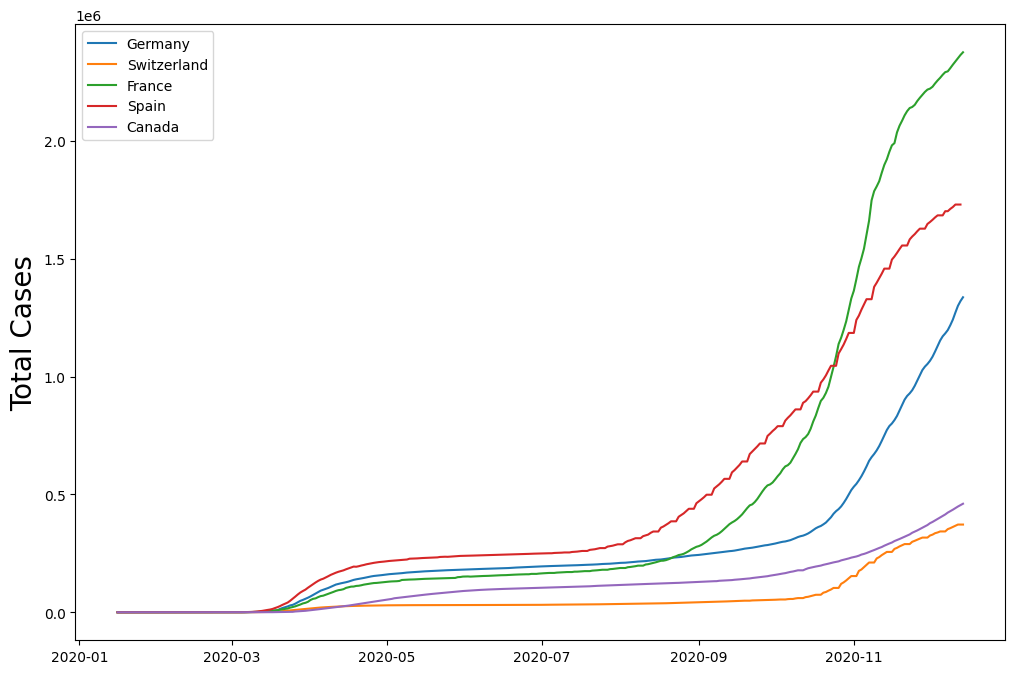

In [5]:
# create separate plot lines for each country in the dataset
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.ylabel("Total Cases", fontsize=20, color="black")
for countryname in list_of_countries:
    x = df_new[df_new["country"] == countryname]["date"]
    y = df_new[df_new["country"] == countryname]["cases_cum"]
    plt.plot(x, y, label=countryname)

plt.legend(list_of_countries, loc="upper left")
plt.show()